This dataset contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. This dataset was taken from UCI Machine Learning

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
data=pd.read_csv('/content/AirQuality.csv', sep=';')
data.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


## Performing EDA

In [4]:
data.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)

In [5]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [6]:
data.shape

(9471, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [8]:
# Replacing the commas in the data and changing it to float values

In [9]:
data.iloc[:,2] = data.iloc[:,2].replace(',','.',regex=True)
data.iloc[:,5] = data.iloc[:,5].replace(',','.',regex=True)
data.iloc[:,12] = data.iloc[:,12].replace(',','.',regex=True)
data.iloc[:,13] = data.iloc[:,13].replace(',','.',regex=True)
data.iloc[:,14] = data.iloc[:,14].replace(',','.',regex=True)

In [10]:
data.drop(['Date','Time'],axis=1,inplace=True)
data = data.astype({'CO(GT)':'float64',
             'C6H6(GT)':'float64',
             'T':'float64',
             'RH':'float64',
             'AH':'float64'})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 962.0 KB


In [12]:
data.head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517


In [13]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


## Pre-Processing

In [14]:
data.isnull().sum()

,0
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114
PT08.S4(NO2),114
PT08.S5(O3),114


In [15]:
#to delete the rows that has nulls
data.dropna(inplace=True)

In [16]:
data.shape

(9357, 13)

In [17]:
data.duplicated().sum()

31

In [18]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [19]:
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9321,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9322,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9323,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9324,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


## Handling Outliers

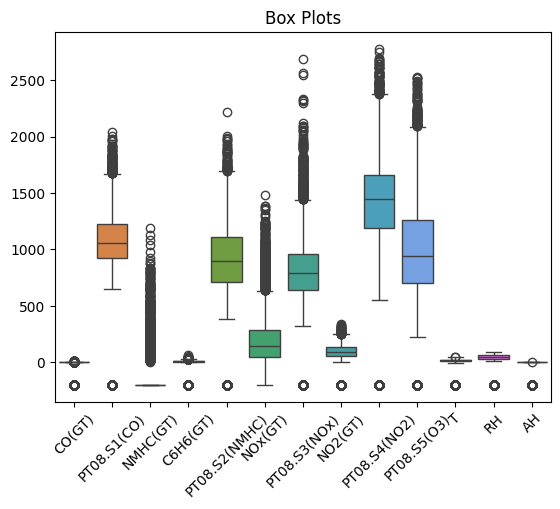

In [20]:
sns.boxplot(data)
plt.xticks(rotation=45)
plt.title('Box Plots');

In [21]:
def remove_outliers(data,column,lower=0.01,upper=0.99):
    lower_bound = data[column].quantile(lower)
    upper_bound = data[column].quantile(upper)

    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    outliers = data[(data[column] <= lower_bound) | (data[column] >= upper_bound)]

    return cleaned_data,outliers

In [22]:
df = data.reset_index().drop('index',axis=1)

In [23]:
df.shape

(9326, 13)

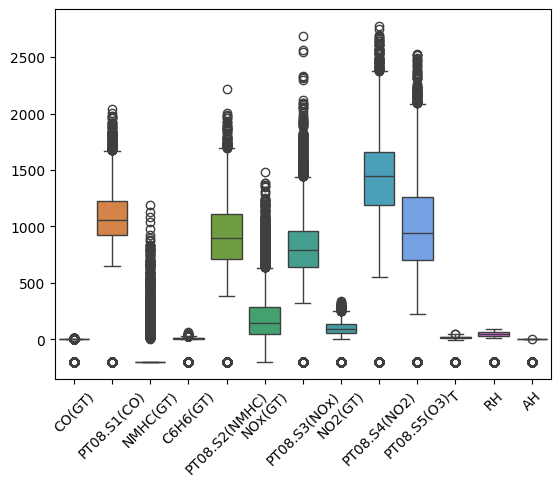

In [24]:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

*As the data mostly consists of outliers, I removed those upto some extent i.e., I removed those data points which lies above 99% quantile and below 1% quantile*

In [27]:
df.skew()


,0
CO(GT),-1.689473
PT08.S1(CO),-1.694625
NMHC(GT),4.067936
C6H6(GT),-4.709609
PT08.S2(NMHC),-0.752770
NOx(GT),0.827866
PT08.S3(NOx),-0.331973
NO2(GT),-1.241254
PT08.S4(NO2),-1.213417
PT08.S5(O3),-0.003496


In [28]:
X = df.copy()

In [29]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

X = pd.DataFrame(pt.fit_transform(X),columns=X.columns)

In [30]:
X.skew()

,0
CO(GT),0.818830
PT08.S1(CO),-0.768056
NMHC(GT),2.706730
C6H6(GT),1.315749
PT08.S2(NMHC),-0.256447
NOx(GT),0.680571
PT08.S3(NOx),0.171067
NO2(GT),-0.103231
PT08.S4(NO2),-0.730554
PT08.S5(O3),0.075553


In [31]:
def compare_kde(column):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    df[column].plot(kind='kde')
    plt.title(column)
    plt.xlabel(column)

    plt.subplot(1,2,2)
    X[column].plot(kind='kde')
    plt.title(column)
    plt.xlabel(column)

    plt.show()

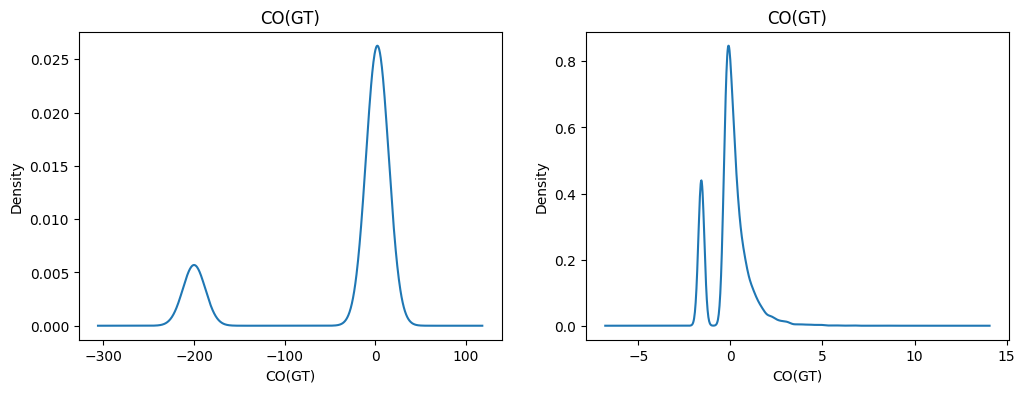

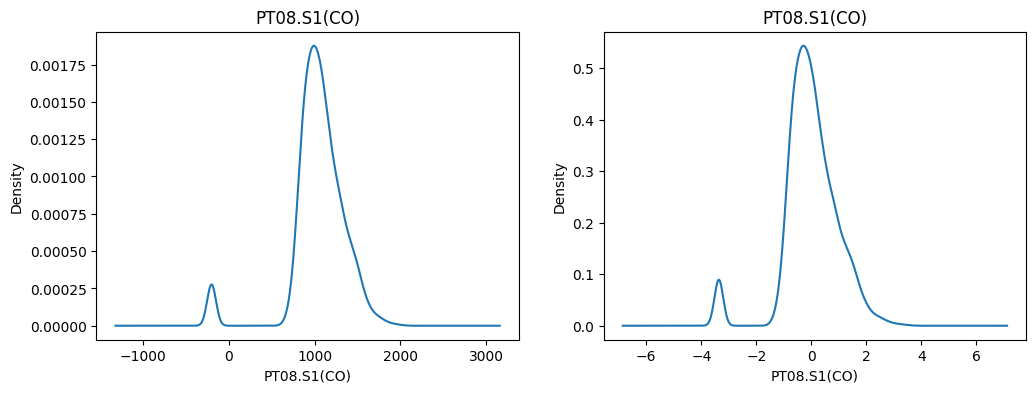

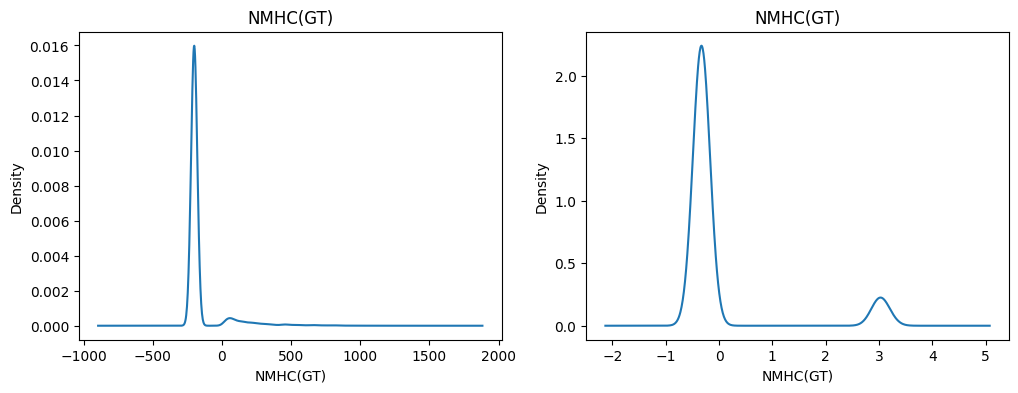

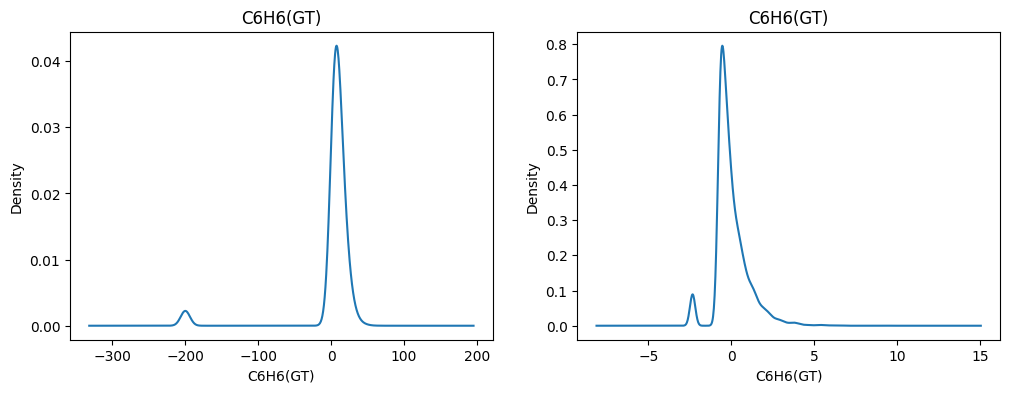

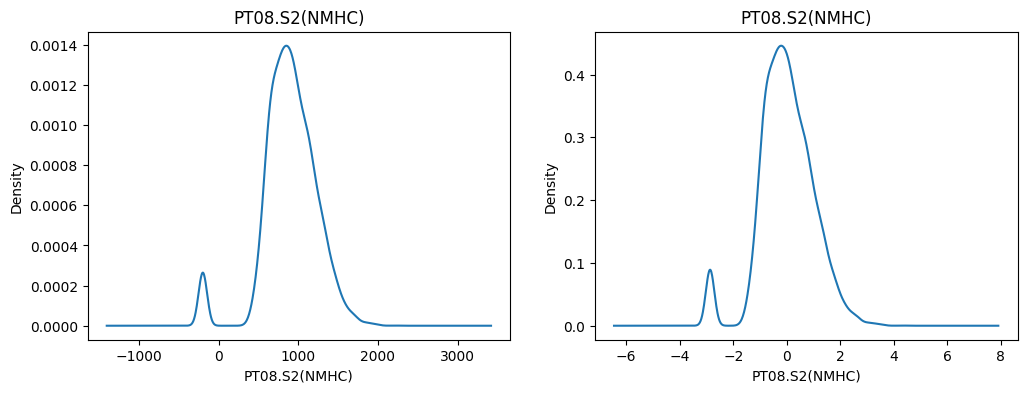

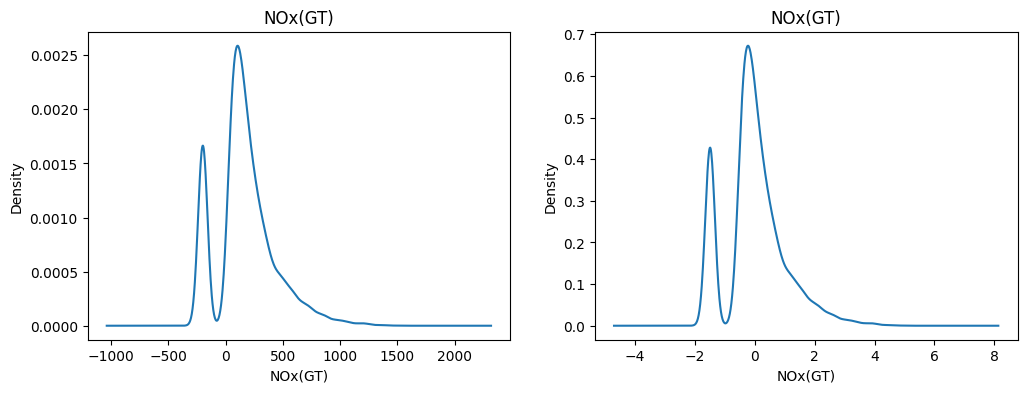

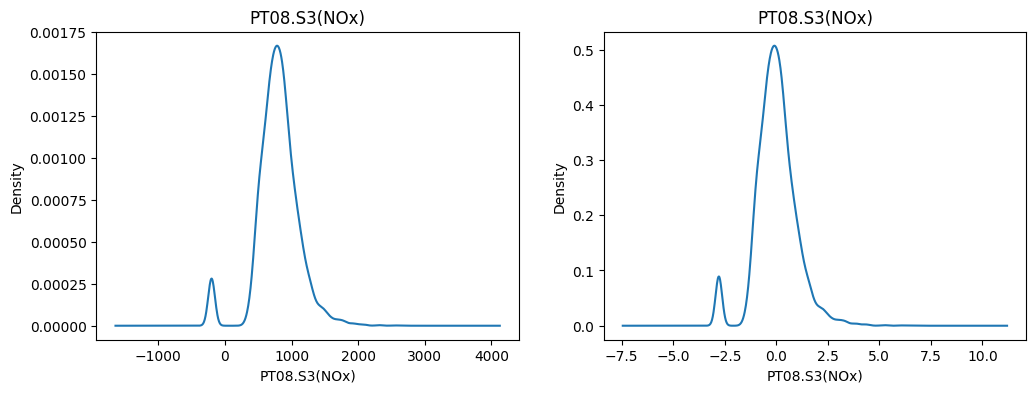

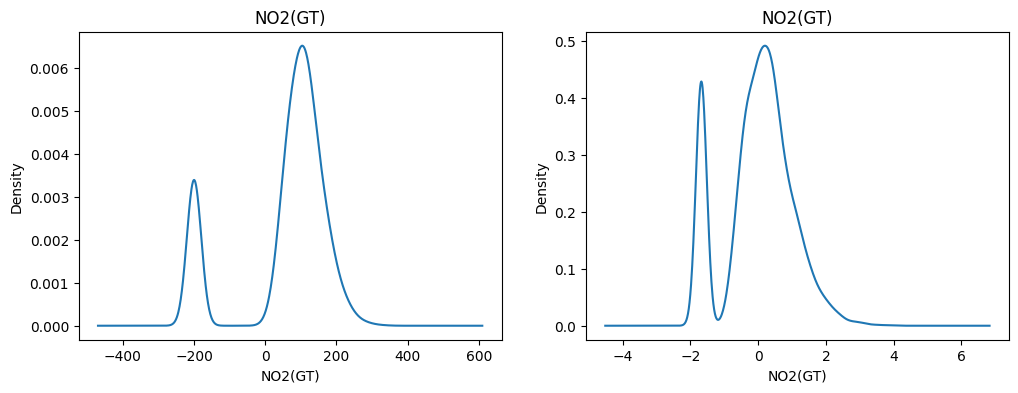

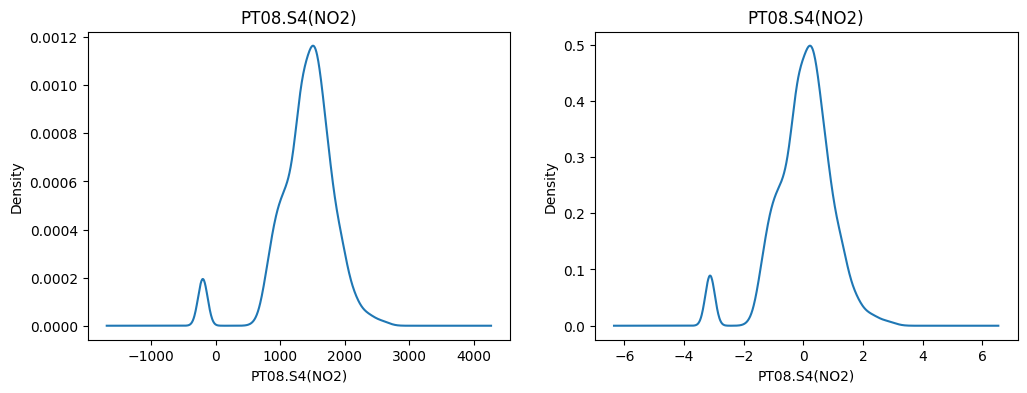

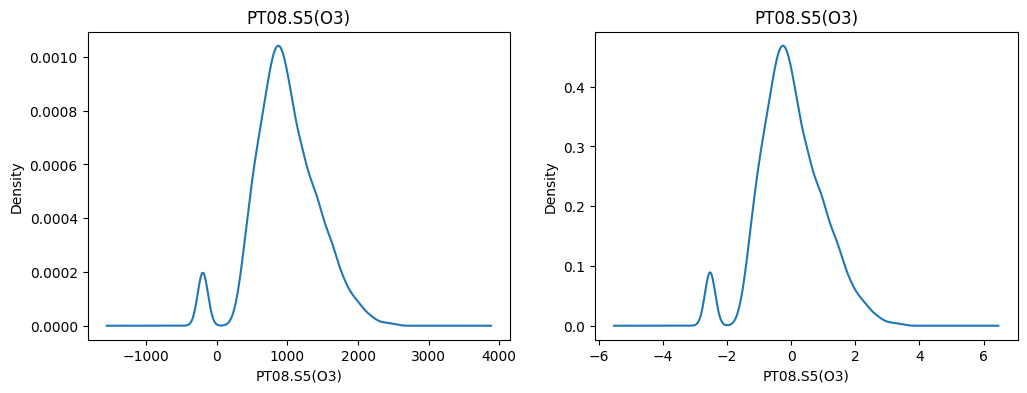

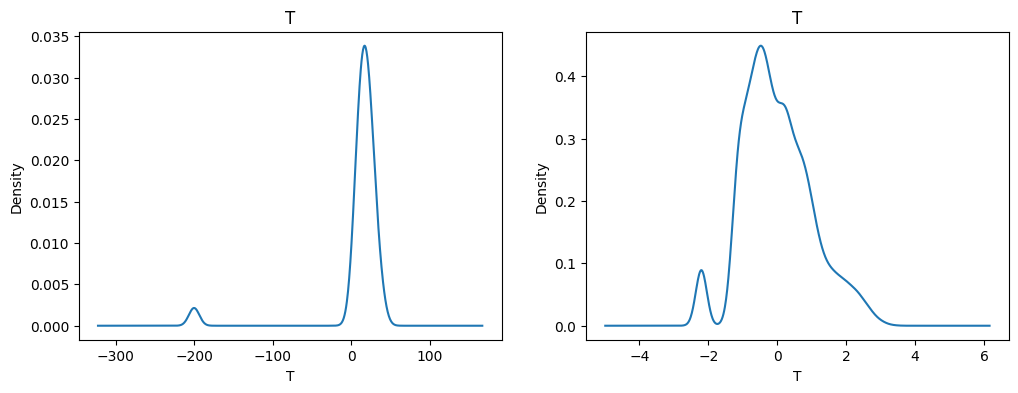

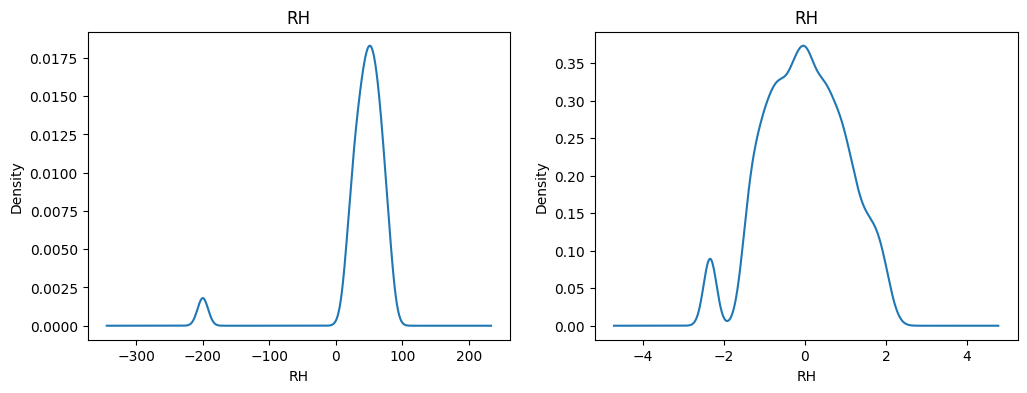

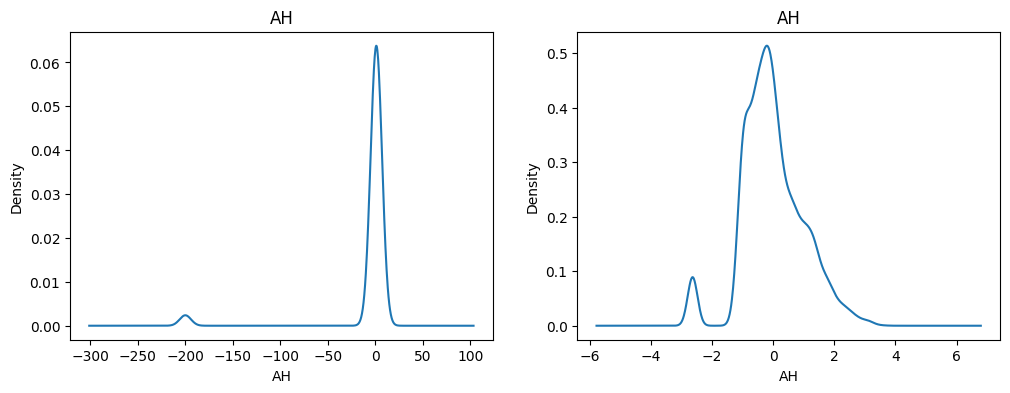

In [32]:
for i in df.columns:
    compare_kde(i)

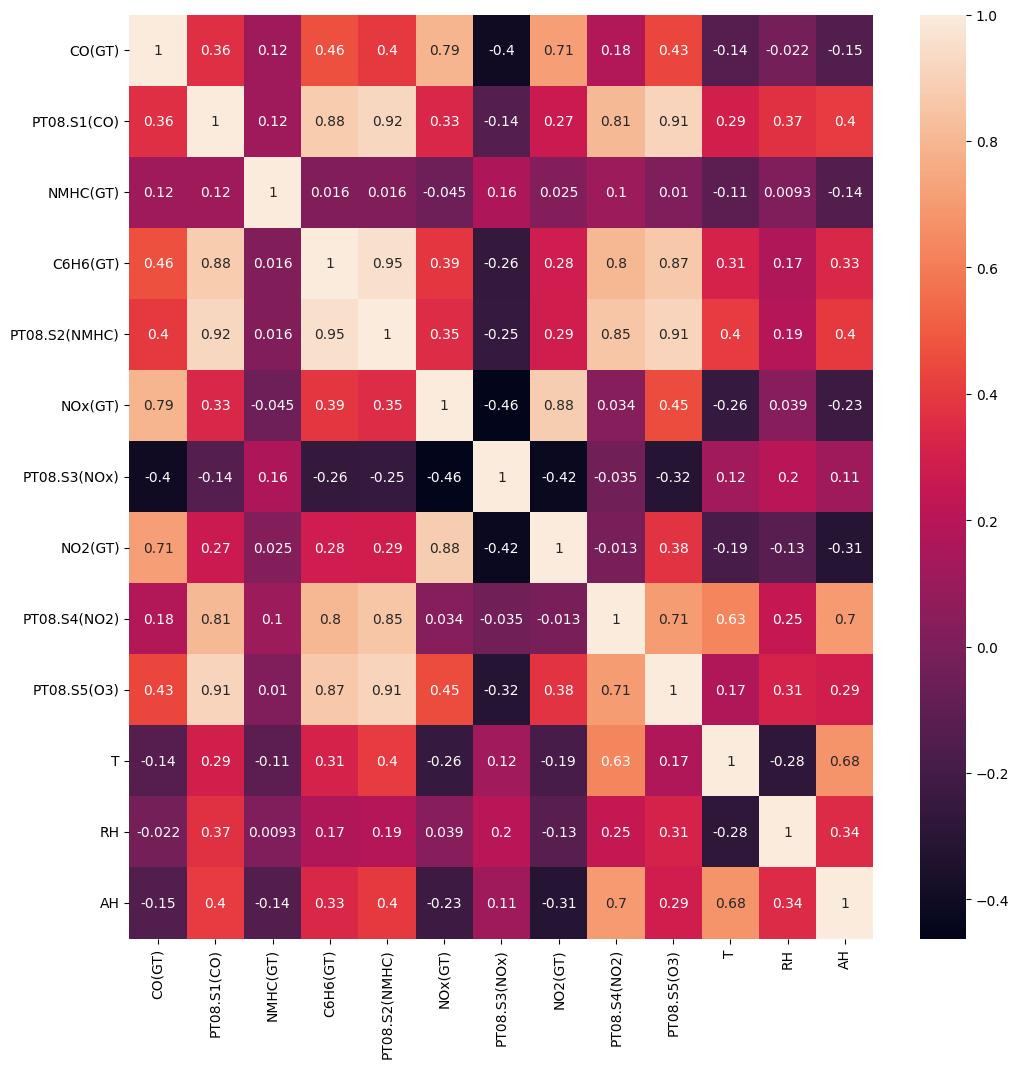

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(),annot=True)
plt.show()

*From the above heatmap, there is a huge impact of PT08.S4(NO2), Temperature, PT08.S1(NMHC), PT08.S1(CO), C6H6(GT)*

In [34]:
def scatter_plot_AH(column):
    plt.scatter(X[column],X['C6H6(GT)'])
    plt.xlabel(column)
    plt.ylabel('C6H6(GT)')
    plt.title(f'{column} vs C6H6(GT)')
    plt.show()

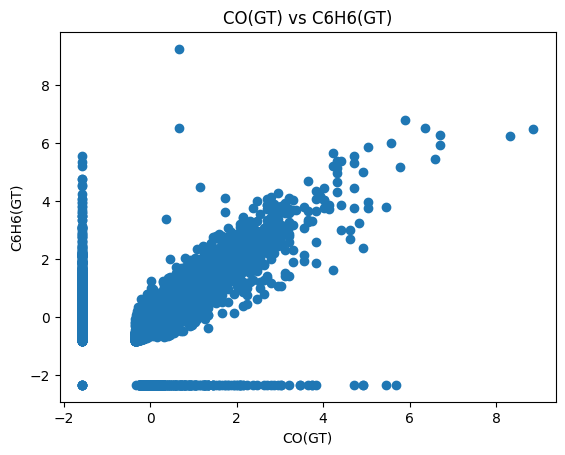

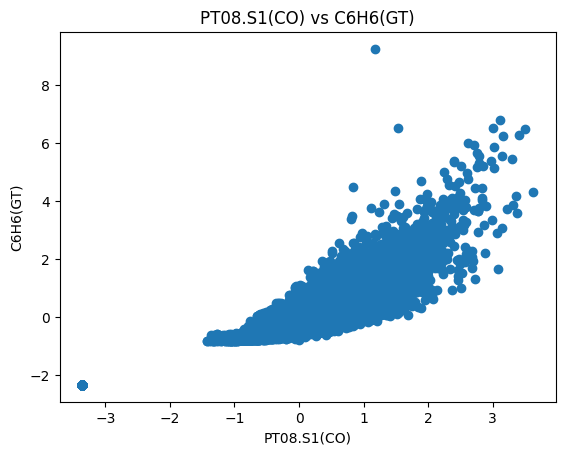

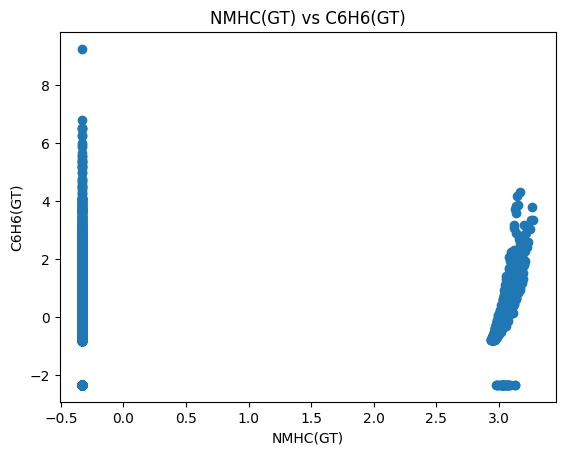

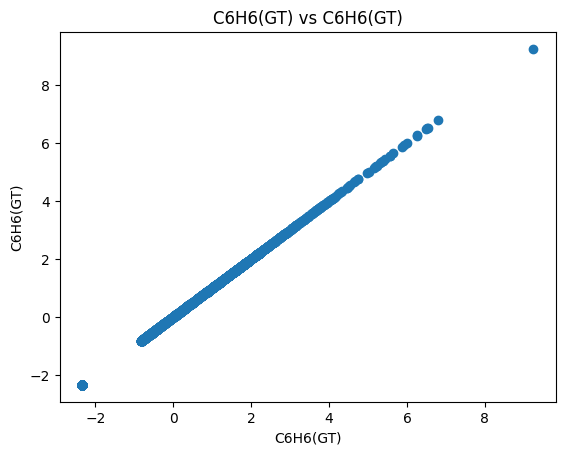

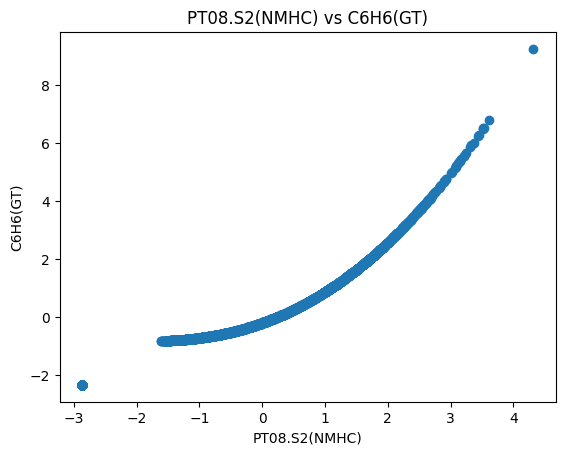

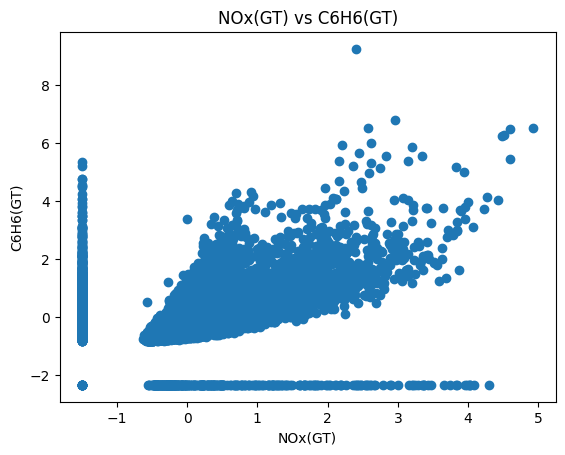

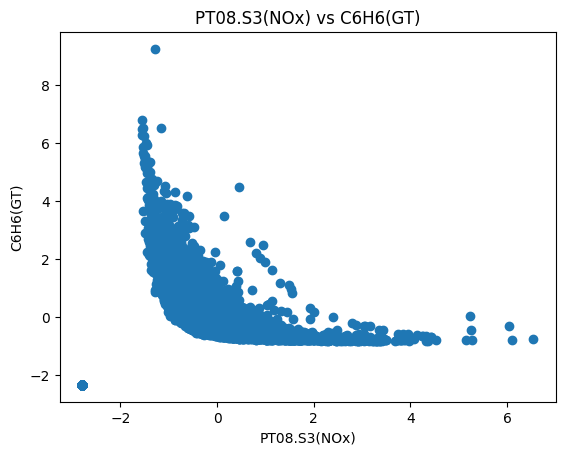

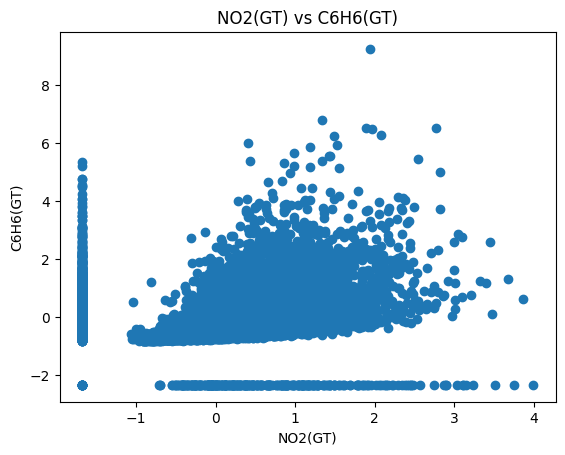

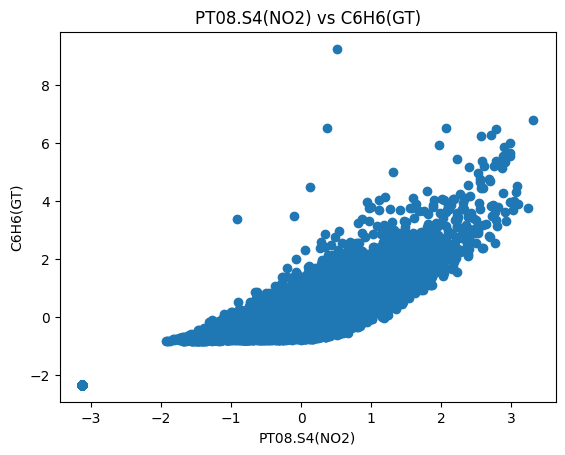

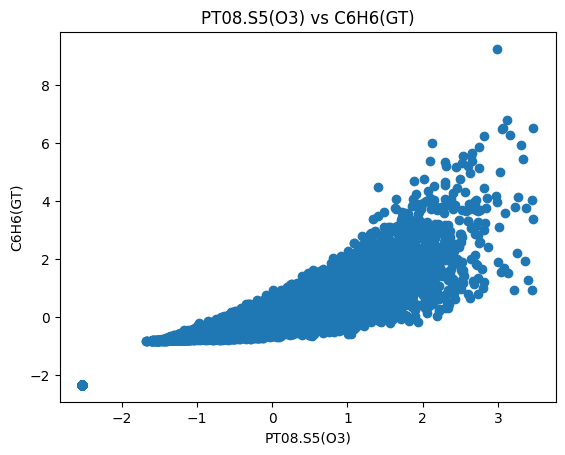

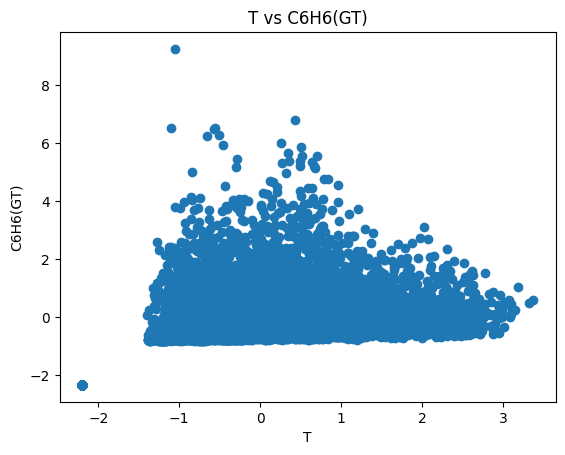

In [35]:
for i in range(len(X.columns)-2):
    scatter_plot_AH(X.columns[i])

## Splitting DataSet

In [36]:
y = X['C6H6(GT)']
X = X.drop('C6H6(GT)',axis=1)

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=6,shuffle=True)

## Model

In [38]:
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential


# Modify the model by adding Dropout layers
dl_model = Sequential()

dl_model.add(Dense(64, input_shape=(X_train.shape[1],)))
dl_model.add(LeakyReLU())
dl_model.add(Dropout(0.2))  # Adding Dropout with a rate of 0.2
dl_model.add(Dense(128, activation='sigmoid'))
dl_model.add(Dropout(0.2))  # Adding Dropout to the second layer
dl_model.add(Dense(1))

# Compile the model
dl_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Display the model summary
dl_model.summary()

# Early stopping callback to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
dl_model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping_callback])

# Predict using the trained model
dl_y_pred = dl_model.predict(X_test).flatten()

# Evaluate the model
dl_r2 = r2_score(y_true=y_test, y_pred=dl_y_pred)
dl_mae = mean_absolute_error(y_true=y_test, y_pred=dl_y_pred)
dl_mse = mean_squared_error(y_true=y_test, y_pred=dl_y_pred)

print(f'Mean Squared Error: {dl_mse}')
print(f'Mean Absolute Error: {dl_mae}')
print(f'R^2 Score: {dl_r2}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,281 (36.25 KB)

 Trainable params: 9,281 (36.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3874 - mse: 0.3874 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1088 - mse: 0.1088 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0881 - mse: 0.0881 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0624 - mse: 0.0624 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0647 - mse: 0.0647 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 9/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

## Feature Importance

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━

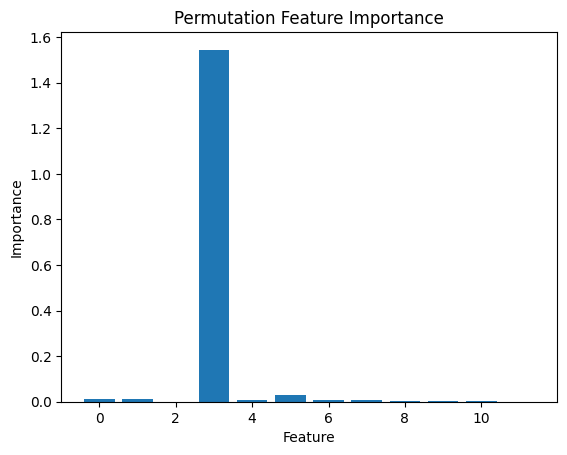

In [39]:
#importance feature
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import numpy as np

# Custom scoring function
def custom_score(model, X, y):
    # Make predictions using the model
    y_pred = model.predict(X)
    # Calculate the mean squared error for regression
    return -mean_squared_error(y, y_pred)  # Negative because higher scores are better

# Get the permutation importance with the custom scoring function
result = permutation_importance(dl_model, X_test, y_test, n_repeats=10, random_state=42, scoring=custom_score)

# Get the importance scores
importances = result.importances_mean

# Plot the feature importances
import matplotlib.pyplot as plt
plt.bar(range(len(importances)), importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.show()

In [41]:
!pip install keras-tuner
import keras_tuner as kt

# Define a function for building the model with hyperparameters
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='sigmoid'))
    model.add(Dense(1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd']), loss='mse', metrics=['mse'])

    return model

# Instantiate the tuner
tuner = kt.Hyperband(build_model, objective='val_loss', max_epochs=10, factor=3, directory='my_dir')

# Run the search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("hyper prameters:")
print(f"neurons in the first layer: {best_hps.get('units')}")
print(f"dropout rate: {best_hps.get('dropout')}")
print(f"nerouns in the seconcd layer: {best_hps.get('units_2')}")
print(f"optimizer: {best_hps.get('optimizer')}")


# Get the best model and evaluate
best_model = tuner.get_best_models(num_models=1)[0]
loss, mse = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Best model evaluation - Loss: {loss}, MSE: {mse}")

Trial 30 Complete [00h 00m 10s]
val_loss: 0.005587113555520773

Best val_loss So Far: 0.004341679625213146
Total elapsed time: 00h 02m 14s
hyper prameters:
neurons in the first layer: 96
dropout rate: 0.4
nerouns in the seconcd layer: 128
optimizer: adam


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best model evaluation - Loss: 0.004341679625213146, MSE: 0.004341679625213146


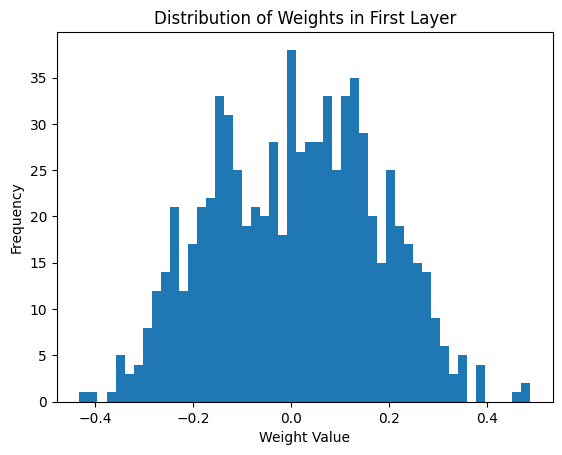

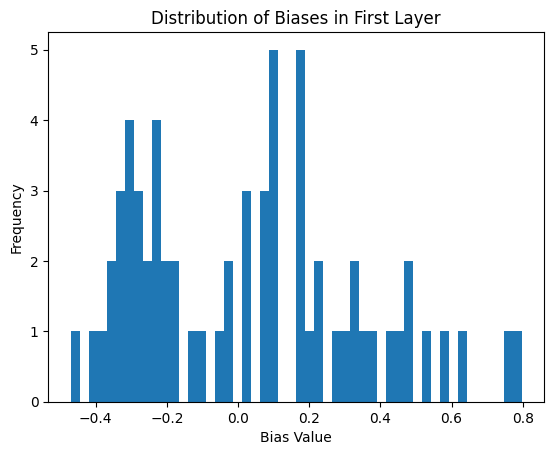

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Get the weights and biases from the trained model
weights, biases = dl_model.layers[0].get_weights()

# Visualizing the weights of the first layer
plt.hist(weights.flatten(), bins=50)
plt.title('Distribution of Weights in First Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()

# Visualizing the biases of the first layer
plt.hist(biases.flatten(), bins=50)
plt.title('Distribution of Biases in First Layer')
plt.xlabel('Bias Value')
plt.ylabel('Frequency')
plt.show()

Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0468 - mse: 0.0468 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 9/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

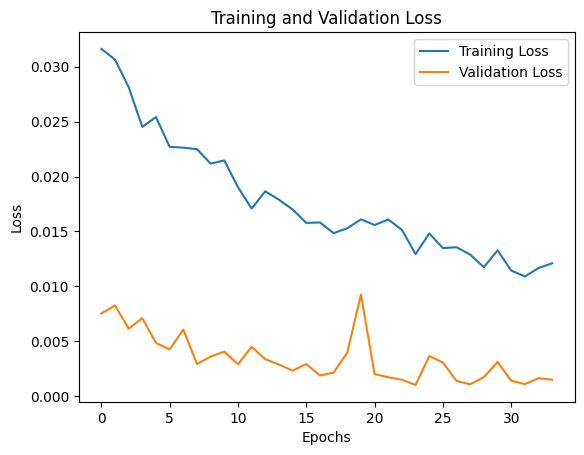

In [43]:
# Assuming you've already trained the model with `history` returned
history = dl_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping_callback])

# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
# Evaluate the model on the test data
test_loss, test_mse = dl_model.evaluate(X_test, y_test)

# Print the Mean Squared Error (MSE)
print(f'Test MSE: {test_mse:.4f}')

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mse: 0.0012
Test MSE: 0.0015


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


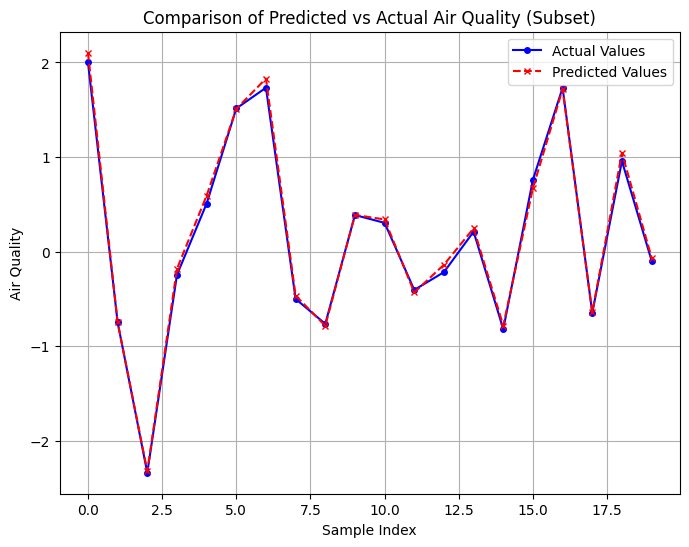

In [45]:
# Generate predictions from the model on the test set
predictions = best_model.predict(X_test)



subset = 20
plt.figure(figsize=(8, 6))
plt.plot(y_test.values[:subset], label='Actual Values', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(predictions[:subset], label='Predicted Values', color='red', linestyle='--', marker='x', markersize=4)
plt.xlabel('Sample Index')
plt.ylabel('Air Quality')
plt.title('Comparison of Predicted vs Actual Air Quality (Subset)')
plt.legend()
plt.grid(True)
plt.show()

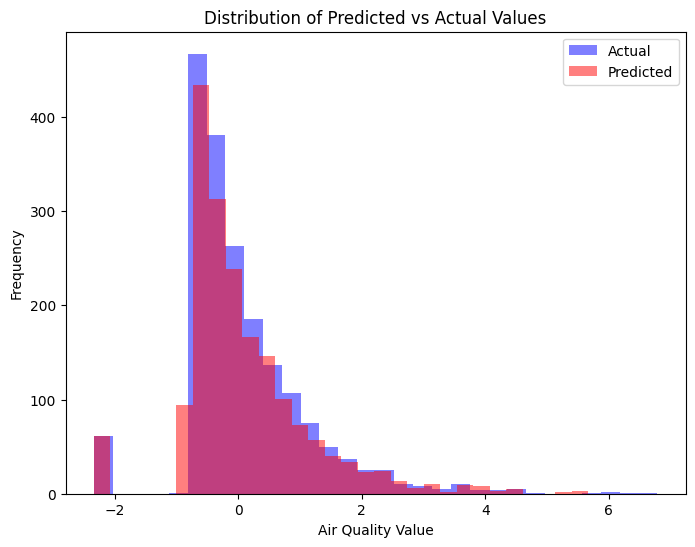

In [46]:
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual', color='blue')
plt.hist(predictions, bins=30, alpha=0.5, label='Predicted', color='red')
plt.xlabel('Air Quality Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs Actual Values')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error

train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train MSE: 0.004886084032909878
Test MSE: 0.004341679661425291


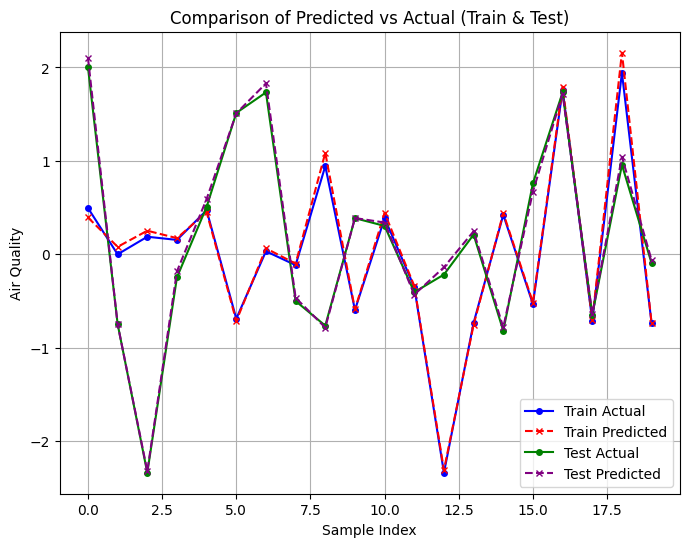

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(y_train.values[:subset], label='Train Actual', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(train_predictions[:subset], label='Train Predicted', color='red', linestyle='--', marker='x', markersize=4)
plt.plot(y_test.values[:subset], label='Test Actual', color='green', linestyle='-', marker='o', markersize=4)
plt.plot(test_predictions[:subset], label='Test Predicted', color='purple', linestyle='--', marker='x', markersize=4)

plt.xlabel('Sample Index')
plt.ylabel('Air Quality')
plt.title('Comparison of Predicted vs Actual (Train & Test)')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5484 - mse: 0.5484 - val_loss: 0.0647 - val_mse: 0.0647
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2088 - mse: 0.2088 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1272 - mse: 0.1272 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1191 - mse: 0.1191 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0843 - mse: 0.0843 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0688 - mse: 0.0688 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0543 - mse: 0.0543 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0680 - mse: 0.0680 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 9/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0508 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters:
Neurons in the first layer: 96
Dropout rate: 0.4
Neurons in the second layer: 128
Optimizer: adam
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Best Model Performance (After Hyperparameter Tuning):
Mean Squared Error: 0.004341679661425291
Mean Absolute Error: 0.03808223861323945
R^2 Score: 0.9960617140204946

Performance Comparison:
Initial MSE: 0.012684272521155861, Best MSE: 0.004341679661425291
Initial R^2: 0.9884942472669911, Best R^2: 0.9960617140204946


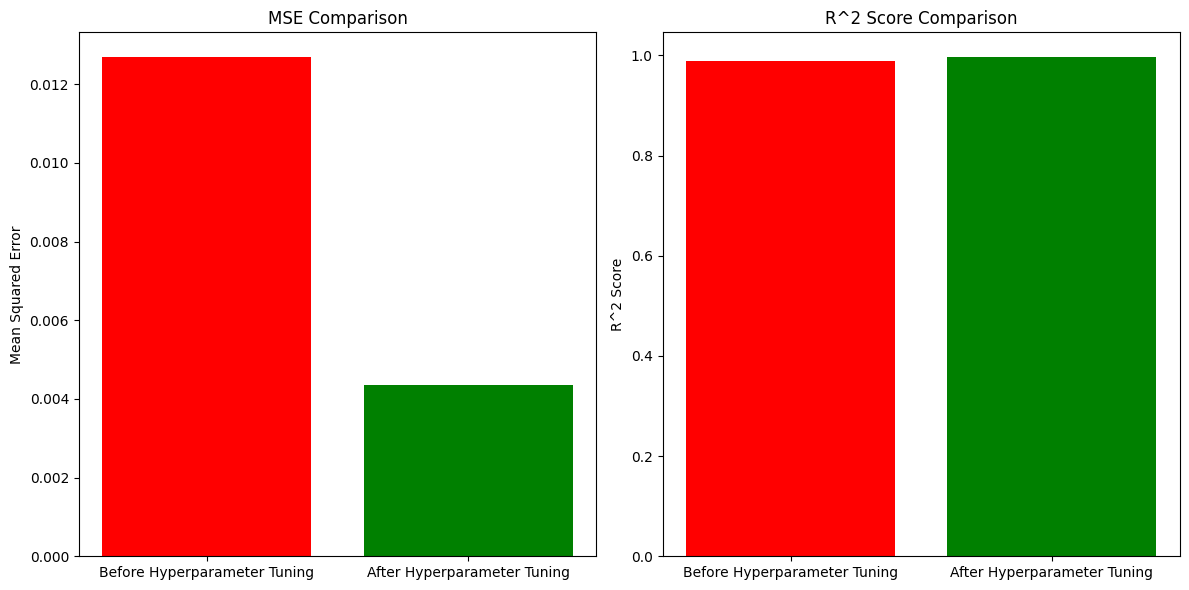

In [49]:
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import keras_tuner as kt
import matplotlib.pyplot as plt

# Step 1: Build and evaluate the initial model (before hyperparameter tuning)

# Build a simple model without tuning
initial_dl_model = Sequential()

initial_dl_model.add(Dense(64, input_shape=(X_train.shape[1],)))
initial_dl_model.add(LeakyReLU())
initial_dl_model.add(Dropout(0.2))
initial_dl_model.add(Dense(128, activation='sigmoid'))
initial_dl_model.add(Dropout(0.2))
initial_dl_model.add(Dense(1))

# Compile the initial model
initial_dl_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Early stopping callback to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the initial model
initial_dl_model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping_callback])

# Predict using the trained model
initial_dl_y_pred = initial_dl_model.predict(X_test).flatten()

# Evaluate the initial model
initial_dl_r2 = r2_score(y_true=y_test, y_pred=initial_dl_y_pred)
initial_dl_mae = mean_absolute_error(y_true=y_test, y_pred=initial_dl_y_pred)
initial_dl_mse = mean_squared_error(y_true=y_test, y_pred=initial_dl_y_pred)

print("Initial Model Performance (Before Hyperparameter Tuning):")
print(f'Mean Squared Error: {initial_dl_mse}')
print(f'Mean Absolute Error: {initial_dl_mae}')
print(f'R^2 Score: {initial_dl_r2}')

# Step 2: Define function for hyperparameter tuning

# Function to build the model with hyperparameters
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='sigmoid'))
    model.add(Dense(1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd']), loss='mse', metrics=['mse'])

    return model

# Step 3: Hyperparameter tuning using Keras Tuner (Hyperband)
tuner = kt.Hyperband(build_model, objective='val_loss', max_epochs=10, factor=3, directory='my_dir')

# Run the search for the best hyperparameters
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Neurons in the first layer: {best_hps.get('units')}")
print(f"Dropout rate: {best_hps.get('dropout')}")
print(f"Neurons in the second layer: {best_hps.get('units_2')}")
print(f"Optimizer: {best_hps.get('optimizer')}")

# Step 4: Evaluate the best model after hyperparameter tuning
loss, mse = best_model.evaluate(X_test, y_test, verbose=0)

# Predict using the best model
best_model_y_pred = best_model.predict(X_test).flatten()

# Evaluate the best model
best_dl_r2 = r2_score(y_true=y_test, y_pred=best_model_y_pred)
best_dl_mae = mean_absolute_error(y_true=y_test, y_pred=best_model_y_pred)
best_dl_mse = mean_squared_error(y_true=y_test, y_pred=best_model_y_pred)

print("\nBest Model Performance (After Hyperparameter Tuning):")
print(f'Mean Squared Error: {best_dl_mse}')
print(f'Mean Absolute Error: {best_dl_mae}')
print(f'R^2 Score: {best_dl_r2}')

# Step 5: Compare performance before and after tuning
print("\nPerformance Comparison:")
print(f"Initial MSE: {initial_dl_mse}, Best MSE: {best_dl_mse}")
print(f"Initial R^2: {initial_dl_r2}, Best R^2: {best_dl_r2}")

# Optional: Plot performance comparison
x_labels = ['Before Hyperparameter Tuning', 'After Hyperparameter Tuning']
mse_values = [initial_dl_mse, best_dl_mse]
r2_values = [initial_dl_r2, best_dl_r2]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(x_labels, mse_values, color=['red', 'green'])
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison')

plt.subplot(1, 2, 2)
plt.bar(x_labels, r2_values, color=['red', 'green'])
plt.ylabel('R^2 Score')
plt.title('R^2 Score Comparison')

plt.tight_layout()
plt.show()

In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
unseen_data = np.array([
    [2.5, 1350.0, 140.0, 10.5, 1030.0, 160.0, 1050.0, 110.0, 1650.0, 1200.0, 12.5, 50.0, 0.7600],  # مثال 1
    [1.8, 1300.0, 100.0, 9.0, 950.0, 120.0, 1150.0, 100.0, 1500.0, 980.0, 13.0, 48.5, 0.7300],   # مثال 2
    [2.3, 1400.0, 90.0, 8.5, 920.0, 130.0, 1100.0, 115.0, 1550.0, 1050.0, 11.8, 52.0, 0.7400],  # مثال 3
    [2.0, 1360.0, 85.0, 9.1, 950.0, 170.0, 1080.0, 120.0, 1600.0, 1180.0, 12.0, 55.0, 0.7700],   # مثال 4
    [1.9, 1275.0, 60.0, 7.8, 840.0, 135.0, 1180.0, 110.0, 1500.0, 1050.0, 11.5, 58.0, 0.7800]    # مثال 5
])


unseen_df = pd.DataFrame(unseen_data, columns=[
    'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
    'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
    'T', 'RH', 'AH'
])


print("Unseen Data for Testing (Original Order with Label as Last Column):")
print(unseen_df)


unseen_labels = unseen_df ['C6H6(GT)']
unseen_features = unseen_df .drop('C6H6(GT)',axis=1)

pt = PowerTransformer(method='yeo-johnson')
unseen_features = pt.fit_transform(unseen_features)


unseen_predictions = best_model.predict(unseen_features)

print("Predictions for unseen examples:")
for i, (prediction, true_label) in enumerate(zip(unseen_predictions, unseen_labels)):
    print(f"Example {i + 1}: Predicted = {prediction[0]:.2f}, Actual = {true_label:.2f}")

Unseen Data for Testing (Original Order with Label as Last Column):
   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.5       1350.0     140.0      10.5         1030.0    160.0   
1     1.8       1300.0     100.0       9.0          950.0    120.0   
2     2.3       1400.0      90.0       8.5          920.0    130.0   
3     2.0       1360.0      85.0       9.1          950.0    170.0   
4     1.9       1275.0      60.0       7.8          840.0    135.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH    AH  
0        1050.0    110.0        1650.0       1200.0  12.5  50.0  0.76  
1        1150.0    100.0        1500.0        980.0  13.0  48.5  0.73  
2        1100.0    115.0        1550.0       1050.0  11.8  52.0  0.74  
3        1080.0    120.0        1600.0       1180.0  12.0  55.0  0.77  
4        1180.0    110.0        1500.0       1050.0  11.5  58.0  0.78  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predictions for unseen examples:
Example 